In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
import os

In [63]:
df = pd.read_csv("../../../cryptoData/BTC_15m_data.csv")

In [64]:
float_data = df.values[:, 1: ,].astype(float)
closing_price = float_data[:,1]

<Strong> 1** </Strong>

<Strong> Univariate or Multivariate ? <Strong>

<p> Why do Univariate models perform better , linear regression (like cutting out parameters that might be important).  </p>



<Strong> 2 ****** </Strong>

<Strong> Techniques To Convert Non - Stationary Data To Stationary? </Strong>

<p> Non-Stationary Data patterns we cannot predict , will not work well in model. Making sure the data is stationary is critical in making sure out model works effectively.  </p>

<p> This is only using univariate data (closing_price). </p>

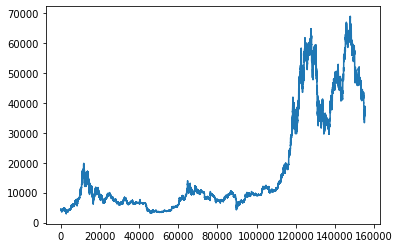

In [65]:
plt.plot( range ( len (closing_price) ) , closing_price )

<p> From the graph we can see that the mean is not constant over time , standard deviation is not constant either.End of the series is more variable than the beginning.  Non stationary data. As the stock grows it increases in volitility. <p>

<Strong> 3 ** </Strong>

<Strong> Normalize if using Univariate ? </Strong>

<p> I thought the point of normalizing was so that all the different ranges of variable , in each feature reads the same , but if we only have one featue , why do we have to normalize ? </p>

In [66]:
mean = closing_price[:200000].mean(axis=0)
closing_price -= mean
std = closing_price[:200000].std(axis=0)
closing_price /= std

<Strong> 4 ** </Strong>

<Strong> Rolling Window or Rolling Origin ? <Strong>

<p> Why is Rolling Window prefered over Rolling Origin , I would of thought as Rolling Origin takes in more samples per prediction , it would do better ?  </p>

<Strong> 5** </Strong>

<Strong> Optimum lag value. </Strong>

<p> Is there a standard or is just trial and error ? </p>

<Strong> 6 ** <Strong>

<Strong> Rolling Window -  Fixed size time-series which we slide in time to predict into future . </Strong>

<p> What I pictured Rolling Window would be. </p>

In [67]:
dummy = np.arange(1, 15)
dummy

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [68]:
# window_size = 4 
# We want 2 validation samples and the rest training
# Not worrying about splitting off a test set in this example.

# 1st iteration - training : x = [1,2,3,4] y = [5]
# 2nd iteration - training : x = [2,3,4,5] y = [6]
# 3rd iteration - training : x = [3,4,5,6] y = [7]
# 4th iteration - training : x = [4,5,6,7] y = [8]

# 5th iteration - validation : x = [5,6,7,8] y = [9]

# 6th iteration - training : x = [6,7,8,9] y = [10]
# 7th iteration - training : x = [7,8,9,10] y = [6]
# 8th iteration - training : x = [8,9,10,11] y = [7]
# 9th iteration - training : x = [9,10,11,12] y = [13]

# 10th iteration - validation : x = [10,11,12,13] y = [14] 

<p> So from above we have 8 samples in training data and 2 samples in validation data. </p>

In [75]:
def rolling_window(train_data , window_size , predict_future_steps):
    for i in range (len(train_data) - window_size - predict_future_steps + 1):

        split_train = train_data[i:window_size+i]
        split_val = train_data[i+window_size:window_size+i+predict_future_steps]

        yield split_train , split_val
            
rolling = rolling_window(dummy , 4 , 1)

for train , val in rolling:
    print(train)
    print(val)

    

[1 2 3 4]
[5]
[2 3 4 5]
[6]
[3 4 5 6]
[7]
[4 5 6 7]
[8]
[5 6 7 8]
[9]
[6 7 8 9]
[10]
[ 7  8  9 10]
[11]
[ 8  9 10 11]
[12]
[ 9 10 11 12]
[13]
[10 11 12 13]
[14]


<p> From above , is val not just y_train ? So where is the validation data coming from ? </p>